# Explore the [Genius.com](https://genius.com/) API

### Import the package

In [1]:
import genius

### Initialize the API client

In [3]:
api = genius.Genius()

### Search for a song

In [11]:
song = api.search_song("A day in the life","The Beatles")
print(song)

Searching for "A day in the life" by The Beatles...
Done.
"A Day in the Life" by The Beatles:
    I read the news today, oh boy
    About a lucky man who made the grade
    And though the news was rather sa...


In [12]:
print(song.lyrics)

I read the news today, oh boy
About a lucky man who made the grade
And though the news was rather sad
Well I just had to laugh
I saw the photograph
He blew his mind out in a car
He didn't notice that the lights had changed
A crowd of people stood and stared
They'd seen his face before
But nobody was really sure if he was from the House of Lords
I saw a film today, oh, boy
The English Army had just won the war
A crowd of people turned away
But I just had to look
Having read the book
I'd love to turn you on
{alarm clock rings}

Woke up, fell out of bed
Dragged a comb across my head
Found my way downstairs and drank a cup
And looking up I noticed I was late
Found my coat and grabbed my hat
Made the bus in seconds flat
Found my way upstairs and had a smoke
And somebody spoke and I went into a dream

I read the news today, oh boy
4,000 holes in Blackburn, Lancashire
And though the holes were rather small
They had to count them all
Now they know how many holes it takes to fill the Albert Hal

### Search for an artist

In [20]:
andy = api.search_artist("Andy Shauf",max_songs=7)
print(andy)

Searching for Andy Shauf...

Song 1: "Alexander All Alone"
Song 2: "Begin Again"
Song 3: "Comfortable With Silence"
Song 4: "Covered in Dust"
Song 5: "Crushes"
Song 6: "Drink My Rivers"
Song 7: "Early to the Party"

Reached user-specified song limit (7).
Found 7 songs.

Done.
Andy Shauf, 7 songs


In [22]:
print(andy.image_url)

https://images.genius.com/16423bad48ffd400aac3ba86d5b86ed4.850x850x1.jpg


In [21]:
andy.songs

[('Alexander All Alone', 'Andy Shauf'),
 ('Begin Again', 'Andy Shauf'),
 ('Comfortable With Silence', 'Andy Shauf'),
 ('Covered in Dust', 'Andy Shauf'),
 ('Crushes', 'Andy Shauf'),
 ('Drink My Rivers', 'Andy Shauf'),
 ('Early to the Party', 'Andy Shauf')]

In [27]:
song = andy.songs[1]
print(song.lyrics[:150])

Begin again
This time you should take a bow at the very end
Its quite an act you put on
Wait til the cameras roll
Youre the leading man
In a film wher


### Oh no, they've changed the API!

In [37]:
# The response format of the JSON object from Genius.com changed...
song.year

KeyError: 'release_date'

## Do some sentiment analysis

In [1]:
import os
from textblob import TextBlob
import matplotlib.pyplot as plt

### Load some lyrics

In [16]:
def load_lyrics(filename):
    if filename[-4:]!='.txt': filename = filename + '.txt'    
    f = open(os.path.join('Lyrics',filename))
    lyrics = f.read()
    f.close
    return lyrics

In [18]:
lyrics = load_lyrics("Lyrics_AndyShauf")

In [19]:
def measure_sentiment(lyrics,verbose=False):
    TB = TextBlob(lyrics)
    p = TB.sentiment.polarity
    s = TB.sentiment.subjectivity
    if verbose:
        print('Positivity:   %.3f' %(p))
        print('Subjectivity: %.3f' %(s))
    return p, s

### Analyze the sentiment for each artist in the Lyrics directory

In [24]:
import numpy as np

artists = os.listdir('Lyrics/')
artist_scores = {}
N = len(artists)
X = np.zeros((N,1))
Y = np.zeros((N,1))
names = []
i=0
for artist in artists:
    lyrics = load_lyrics(artist)
    names.append(artist.split('Lyrics_')[1].split('.txt')[0])
    print('\n'+names[i])
    artist_scores[names[i]] = measure_sentiment(lyrics)
    X[i] = artist_scores[names[i]][0] # Store for plotting
    Y[i] = artist_scores[names[i]][1]    
    i+=1


KanyeWest

Common

Tupac

TheBeatles

TheNotoriousBIG

Q-Tip

IceCube

VicMensa

SnoopDogg

ChanceTheRapper

LilWayne

MosDef

WarrenG

Nas

TalibKweli

Jay-Z

GucciMane


### Plot each artist's sentiment

In [27]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


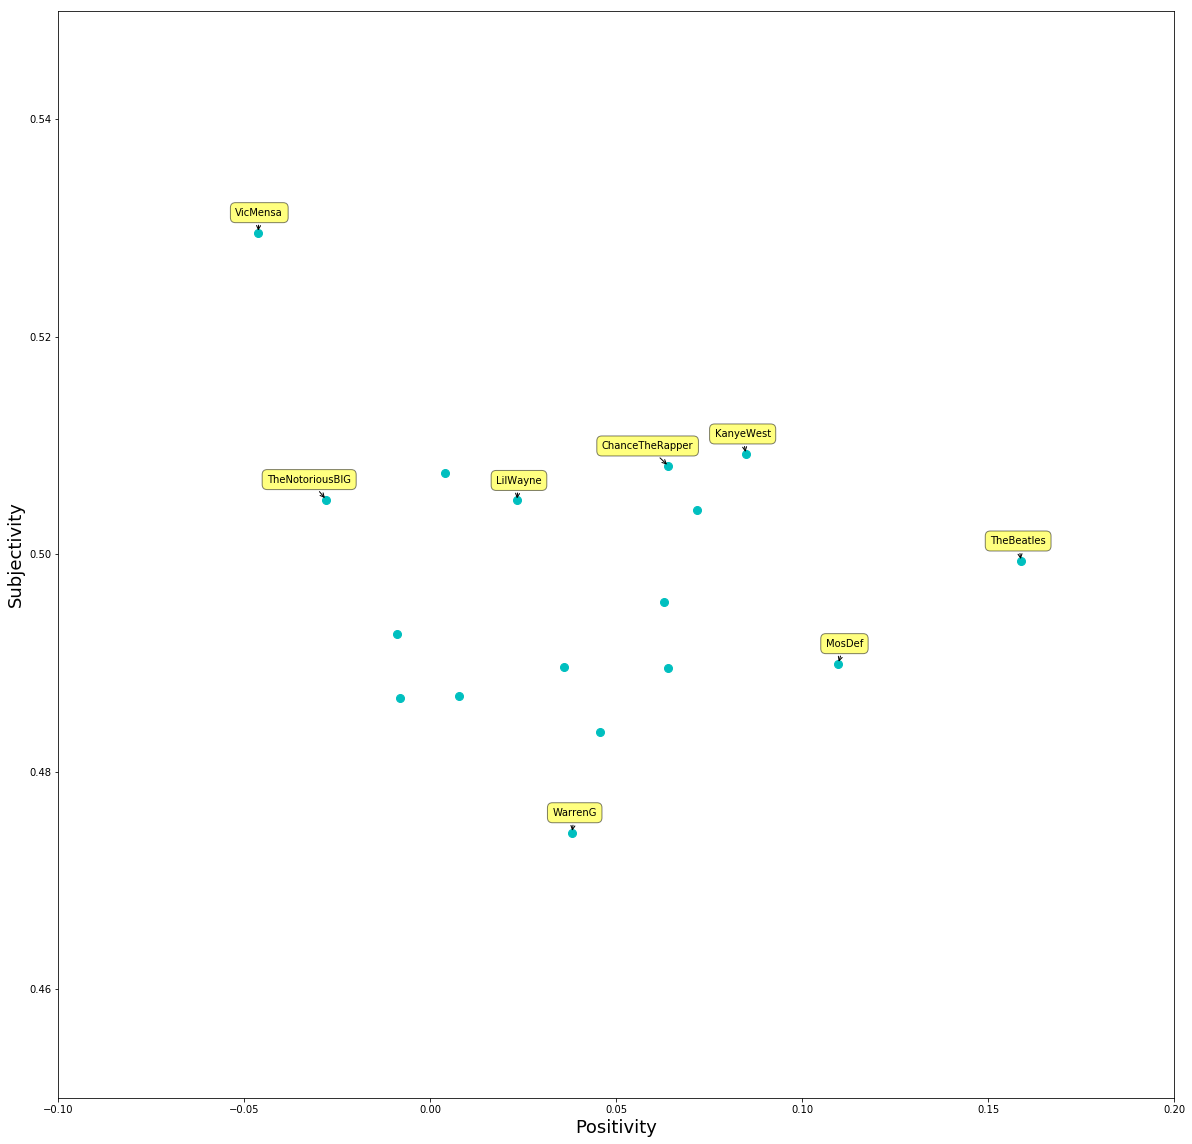

In [42]:
# Plot each artist's positivity and subjectivity scores
plt.plot(X,Y,'co',markersize=8)
plt.xlim((-0.1, 0.2)); plt.ylim((0.45, 0.55))
plt.xlabel('Positivity',fontsize=18)
plt.ylabel('Subjectivity',fontsize=18)

label_names = ['TheBeatles','WarrenG','ChanceTheRapper','VicMensa','MosDef','KanyeWest','LilWayne','TheNotoriousBIG']

for name in label_names:
    plt.annotate(
        name, xy=(artist_scores[name]), xytext=(25,15),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.show()
figsize(20,20)